### Let's setup the environment by importing required libraries.¶

In [4]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from bs4 import BeautifulSoup
import csv


import geocoder # to get longitude and latitude

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [5]:
import requests
url = 'https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Coimbatore'

html = requests.get(url)
print(html)

<Response [200]>


In [6]:
#!conda install -c conda-forge parse --yes

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

In [9]:
pd.set_option('max_colwidth', 800)

In [10]:
url = 'https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Coimbatore'

html = requests.get(url)
print(html)

<Response [200]>


In [11]:
soup = BeautifulSoup(html.text, 'html.parser')

In [12]:
csv_file = open('coimbatore.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [13]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [14]:
csv_file.close()

In [15]:
coimbatore_raw = pd.read_csv('coimbatore.csv')

In [16]:
coimbatore_raw.shape

(34, 1)

In [17]:
coimbatore_raw

,Neighbourhood
0,Chinniampalayam
1,"Ganapathy, Coimbatore"
2,"Gandhipuram, Coimbatore"
3,Goundampalayam
4,Kalapatti
5,Keeranatham
6,Kuniyamuthur
7,Kurichi
8,Kurumbapalayam SSKulam
9,Maniyakarampalayam


In [18]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = coimbatore_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Coimbatore, India'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [19]:
cov_data = coimbatore_raw
cov_data['Latitude'] = lat
cov_data['Longitude'] = lng

In [20]:
cov_data.head()

,Neighbourhood,Latitude,Longitude
0,Chinniampalayam,11.03235,77.07564
1,"Ganapathy, Coimbatore",11.08566,76.92786
2,"Gandhipuram, Coimbatore",11.01926,76.96792
3,Goundampalayam,11.04528,76.94729
4,Kalapatti,11.07809,77.03755


### Let's setup FourSquare credentials.

In [21]:
CLIENT_ID = 'LL1LBEFAEK1125WO2NKL4ADTRV3GFJ2CW0Y4B451T5MRFTT4' # your Foursquare ID
CLIENT_SECRET = 'VZGX0VWO0CTHHYPBFNH5IBMCKDSDDAZW3FWTEQQRBHRIX3N4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LL1LBEFAEK1125WO2NKL4ADTRV3GFJ2CW0Y4B451T5MRFTT4
CLIENT_SECRET:VZGX0VWO0CTHHYPBFNH5IBMCKDSDDAZW3FWTEQQRBHRIX3N4


### Now we will get Latitude and Longitude of Coimbatore.

In [22]:
from geopy.geocoders import Nominatim

address = 'Coimbatore, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Coimbatore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Coimbatore are 11.0018115, 76.9628425.


### Let's plot map of Coimbatore using latitude and longitude values.

In [23]:
cov_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(cov_data['Latitude'], cov_data['Longitude'], cov_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cov_map)  
    
cov_map

### In the following call we will create a function which will extract the category from the FourSquare venues. Later we will apply FourSquare API in all the neighbourhoods on Coimbatore

In [24]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
explore_df_list = []

for i, nhood_name in enumerate(cov_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = cov_data.loc[i, 'Neighbourhood']
        nhood_lat = cov_data.loc[i, 'Latitude']
        nhood_lng = cov_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


### Now we will create a dataframe for performing clustering.

In [26]:
explore_cov = pd.DataFrame([item for item in explore_df_list])
explore_cov.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_cov.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,"Ganapathy, Coimbatore",11.08566,76.92786,Ramdev Chats,Bakery,11.085356,76.921233
1,"Gandhipuram, Coimbatore",11.01926,76.96792,Sree Annapoorna Sree Gowrishankar,Vegetarian / Vegan Restaurant,11.016260,76.967459
2,"Gandhipuram, Coimbatore",11.01926,76.96792,Junior Kuppana,Indian Restaurant,11.011269,76.965129
3,"Gandhipuram, Coimbatore",11.01926,76.96792,Glacier Park,Ice Cream Shop,11.017280,76.966143
4,"Gandhipuram, Coimbatore",11.01926,76.96792,Nalas Aappa Kadai,Indian Restaurant,11.019501,76.970137


### Now we will perform one-hot encoding to analyze neighbourhoods of Coimbatore

In [27]:
cov_1hot = pd.get_dummies(explore_cov[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
cov_1hot['Neighbourhood'] = explore_cov['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [cov_1hot.columns[-1]] + cov_1hot.columns[:-1].values.tolist()
cov_1hot = cov_1hot[fixed_columns]

cov_1hot.head()

,Neighbourhood,ATM,Accessories Store,Aquarium,Asian Restaurant,BBQ Joint,Bakery,Bar,Board Shop,Boutique,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,Chinese Restaurant,Clothing Store,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit,Fast Food Restaurant,Food Court,Food Truck,Furniture / Home Store,Gym,Gym / Fitness Center,Halal Restaurant,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Jewelry Store,Juice Bar,Market,Miscellaneous Shop,Multiplex,North Indian Restaurant,Park,Pharmacy,Photography Studio,Pizza Place,Platform,Restaurant,Road,Shop & Service,Shopping Mall,Snack Place,Spa,Sports Club,Stadium,Steakhouse,Tea Room,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Voting Booth,Warehouse Store,Women's Store
0,"Ganapathy, Coimbatore",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Gandhipuram, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,"Gandhipuram, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Gandhipuram, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Gandhipuram, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### In the following step we will aggregate the venues by neighbourhoods and later we will create a function to return most common venues.

In [28]:
cov_grouped = cov_1hot.groupby('Neighbourhood').mean().reset_index()
cov_grouped.head()

,Neighbourhood,ATM,Accessories Store,Aquarium,Asian Restaurant,BBQ Joint,Bakery,Bar,Board Shop,Boutique,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,Chinese Restaurant,Clothing Store,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit,Fast Food Restaurant,Food Court,Food Truck,Furniture / Home Store,Gym,Gym / Fitness Center,Halal Restaurant,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Jewelry Store,Juice Bar,Market,Miscellaneous Shop,Multiplex,North Indian Restaurant,Park,Pharmacy,Photography Studio,Pizza Place,Platform,Restaurant,Road,Shop & Service,Shopping Mall,Snack Place,Spa,Sports Club,Stadium,Steakhouse,Tea Room,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Voting Booth,Warehouse Store,Women's Store
0,"Ganapathy, Coimbatore",0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,"Gandhipuram, Coimbatore",0.0,0.0,0.0,0.105263,0.0,0.000000,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.052632,0.052632,0.0,0.263158,0.0,0.0,0.105263,0.0,0.0,0.052632,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.052632
2,Goundampalayam,0.0,0.0,0.0,0.166667,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,Kalapatti,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,Keeranatham,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [29]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

### Now we will create a new dataframe to get the top 10 venues.

In [30]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = cov_grouped['Neighbourhood']

for ind in np.arange(cov_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(cov_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ganapathy, Coimbatore",Bakery,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
1,"Gandhipuram, Coimbatore",Indian Restaurant,Asian Restaurant,Jewelry Store,Women's Store,Snack Place,Bus Line,Clothing Store,Department Store,Hotel,Miscellaneous Shop
2,Goundampalayam,Indian Restaurant,Bakery,Food Truck,Asian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit
3,Kalapatti,ATM,Sports Club,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
4,Keeranatham,Business Service,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit


### Now we will apply K-means clustering on the dataframe.

In [31]:
cov_grouped_clustering = cov_grouped.drop('Neighbourhood', 1)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [33]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for cov_clusters in range(2, max_range) :
    
    # Run k-means clustering
    cov_gc = cov_grouped_clustering
    kmeans = KMeans(n_clusters = cov_clusters, init = 'k-means++', random_state = 0).fit_predict(cov_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(cov_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(cov_clusters)
    scores.append(score)

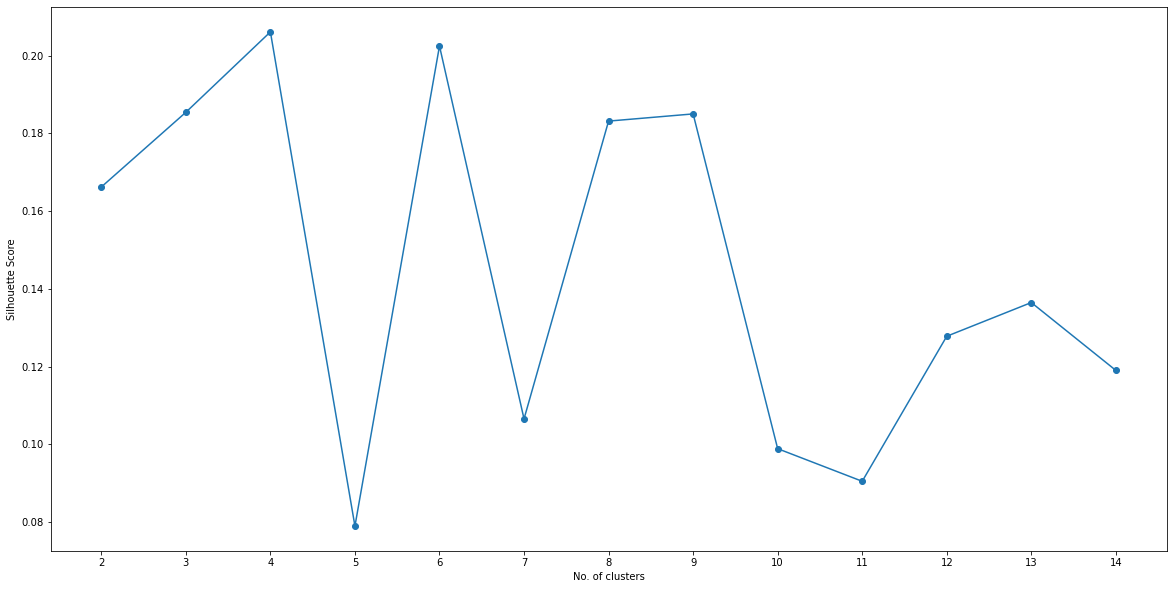

In [34]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [35]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

4

In [36]:
opt_value = 4

### Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering

In [37]:
cov_clusters = opt_value

# Run k-means clustering
cov_gc = cov_grouped_clustering
kmeans = KMeans(n_clusters = cov_clusters, init = 'k-means++', random_state = 0).fit(cov_gc)

In [38]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Now we will crate a final version of dataframe containing all the necessary data.

In [40]:
cov_final = cov_data
cov_final = cov_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
cov_final.dropna(inplace = True)
cov_final['Cluster Labels'] = cov_final['Cluster Labels'].astype(int)
cov_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Ganapathy, Coimbatore",11.08566,76.92786,0,Bakery,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
2,"Gandhipuram, Coimbatore",11.01926,76.96792,1,Indian Restaurant,Asian Restaurant,Jewelry Store,Women's Store,Snack Place,Bus Line,Clothing Store,Department Store,Hotel,Miscellaneous Shop
3,Goundampalayam,11.04528,76.94729,0,Indian Restaurant,Bakery,Food Truck,Asian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit
4,Kalapatti,11.07809,77.03755,3,ATM,Sports Club,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
5,Keeranatham,11.11516,76.99552,2,Business Service,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit


### In the next step we will visualize the clusters using Folium.

In [41]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(cov_clusters)
ys = [i + x + (i*x)**2 for i in range(cov_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cov_final['Latitude'], cov_final['Longitude'], cov_final['Neighbourhood'], 
                                  cov_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

## Now lets have a look at all four clusters

### Cluster 1

In [42]:
val = 1
cov_final.loc[cov_final['Cluster Labels'] == (val - 1), cov_final.columns[[0] + np.arange(4, cov_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Ganapathy, Coimbatore",Bakery,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
3,Goundampalayam,Indian Restaurant,Bakery,Food Truck,Asian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit
6,Kuniyamuthur,Bakery,Indian Restaurant,Department Store,Women's Store,Clothing Store,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court
8,Kurumbapalayam SSKulam,Bakery,Fast Food Restaurant,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Exhibit
14,Perur,ATM,Bakery,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
26,Thudiyalur,Bakery,Bus Station,Indian Restaurant,Women's Store,Exhibit,Department Store,Dessert Shop,Diner,Electronics Store,Food Court
32,Vellalore,Burger Joint,Indian Restaurant,Bakery,Women's Store,Department Store,Dessert Shop,Diner,Electronics Store,Exhibit,Food Court
33,Vilankurichi,Gym,Bakery,Department Store,Women's Store,Chinese Restaurant,Gym / Fitness Center,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant


### Cluster 2

In [43]:
val = 2
cov_final.loc[cov_final['Cluster Labels'] == (val - 1), cov_final.columns[[0] + np.arange(4, cov_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Gandhipuram, Coimbatore",Indian Restaurant,Asian Restaurant,Jewelry Store,Women's Store,Snack Place,Bus Line,Clothing Store,Department Store,Hotel,Miscellaneous Shop
7,Kurichi,Bus Station,Hotel,Indian Restaurant,Business Service,Juice Bar,Asian Restaurant,Furniture / Home Store,Food Truck,Food Court,Convenience Store
9,Maniyakarampalayam,Exhibit,Photography Studio,Women's Store,Hotel,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant
10,Meena Estate,Gym / Fitness Center,Gym,Indian Sweet Shop,Women's Store,Hotel,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
11,Neighbourhoods of Coimbatore,Indian Restaurant,Bus Station,Hotel,Clothing Store,Juice Bar,Pizza Place,Platform,Shop & Service,Shopping Mall,Multiplex
12,Ondipudur,Halal Restaurant,Furniture / Home Store,Pharmacy,Hotel,Gym / Fitness Center,Gym,Food Truck,Food Court,Fast Food Restaurant,Exhibit
15,Podanur,Warehouse Store,Department Store,Aquarium,Cafeteria,Fast Food Restaurant,Dessert Shop,Diner,Electronics Store,Exhibit,Food Court
16,Puliakulam,Indian Restaurant,Gym / Fitness Center,Gym,Women's Store,Hotel,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
17,"R. S. Puram, Coimbatore",Multiplex,Fast Food Restaurant,Clothing Store,Café,Asian Restaurant,Shopping Mall,Ice Cream Shop,Restaurant,Food Court,Indian Restaurant
18,"Ram Nagar, Coimbatore",Clothing Store,Indian Restaurant,Asian Restaurant,Café,Ice Cream Shop,Shopping Mall,Hotel,Multiplex,Department Store,Dessert Shop


### Cluster 3

In [44]:
val = 3
cov_final.loc[cov_final['Cluster Labels'] == (val - 1), cov_final.columns[[0] + np.arange(4, cov_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Keeranatham,Business Service,Women's Store,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit


### Cluster 4

In [45]:
val = 4
cov_final.loc[cov_final['Cluster Labels'] == (val - 1), cov_final.columns[[0] + np.arange(4, cov_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Kalapatti,ATM,Sports Club,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit
13,Peelamedu,ATM,Pharmacy,Indian Restaurant,Snack Place,Electronics Store,Convenience Store,Department Store,Dessert Shop,Diner,Exhibit
30,Veerakeralam,ATM,Bar,Chinese Restaurant,Gym / Fitness Center,Gym,Furniture / Home Store,Food Truck,Food Court,Fast Food Restaurant,Exhibit


## After studying all four clusters, it is recommended to the client that neighbourhoods such as Ganapathy, Perur, Vilankurichi that fall in Cluster 1 seems to be good locations for starting a restaurant.